In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [41]:
dados = pd.read_csv('/content/A172121189_28_143_208.csv', encoding='ISO 8859-1', skiprows=3, skipfooter=12, sep = ';', thousands='.', 
decimal=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [42]:
colunas_usaveis = dados.mean().index.tolist() # Transforma a coluna meses em index e os coloca/transforma em uma lista (listas são mutáveis, index não são)
colunas_usaveis.insert(0, 'Unidade da Federação')

usaveis = dados[colunas_usaveis]

#Transformando a coluna 'Unidade da Federação' em índice, desta forma, eliminando o índice numérico (que vai de 0 até 26).
usaveis = usaveis.set_index('Unidade da Federação')

In [43]:
usaveis.T
# Eliminando a linha 'Total' usando drop(), vale ressaltar que o axis=0 -> coluna; axis=1 -> linha
usaveis = usaveis.drop('Total', axis=1)

# **Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.**

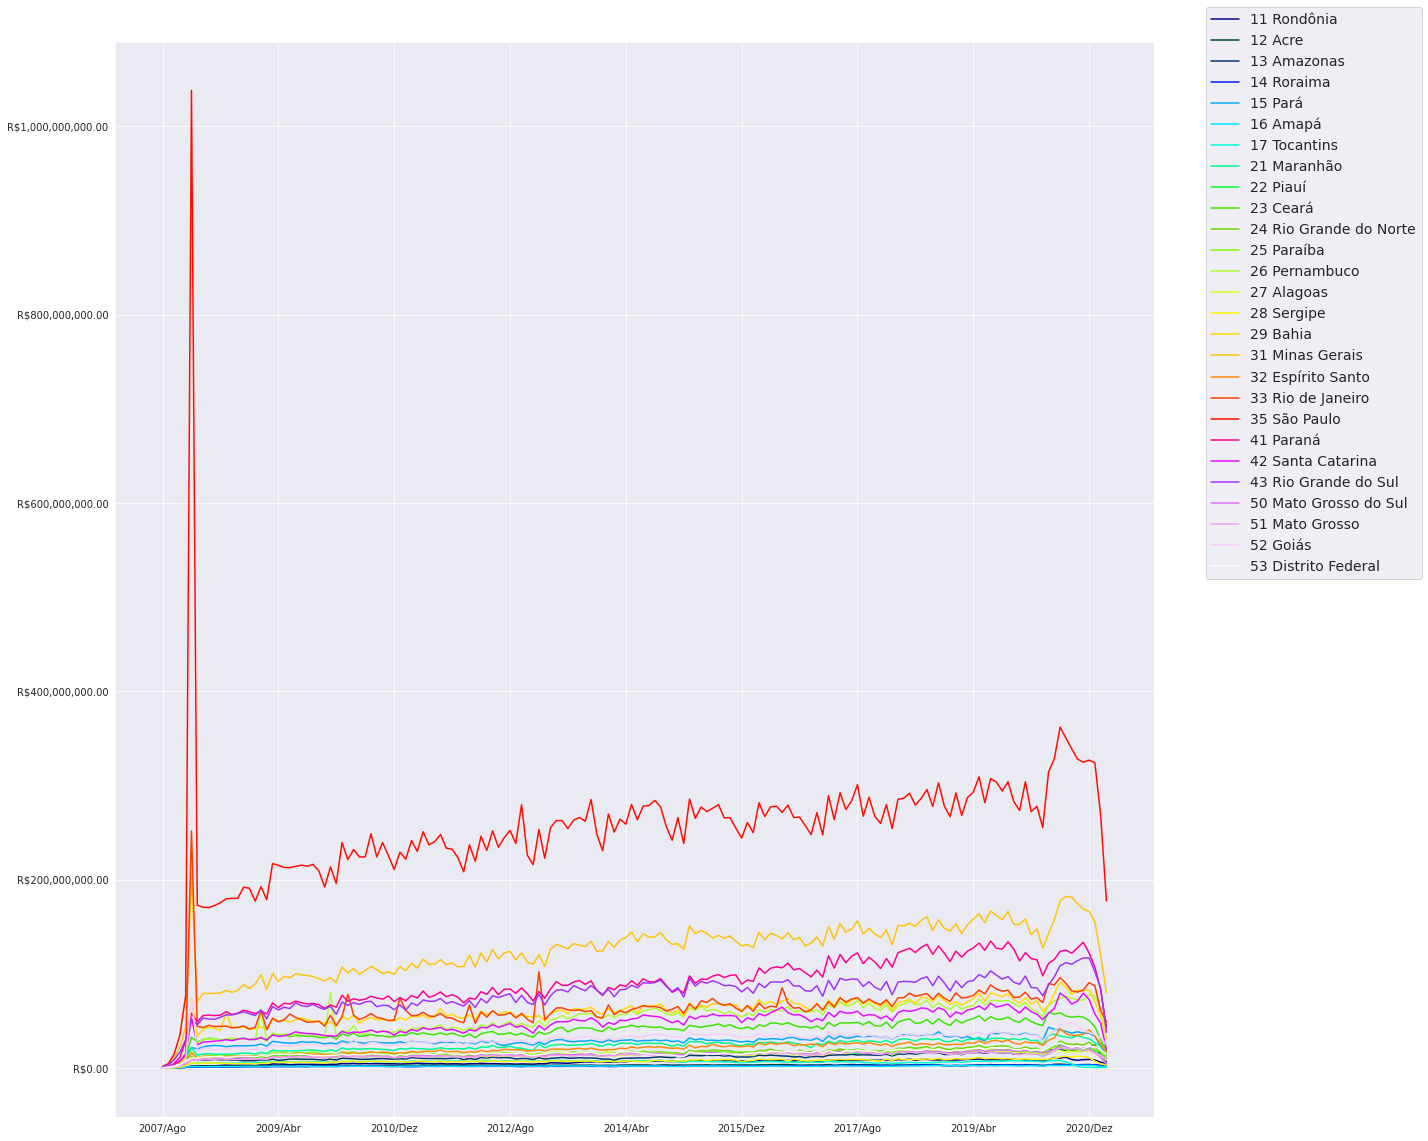

In [44]:
sns.set_style('darkgrid')

ax = usaveis.T.plot(figsize=(20, 17)) # Cria o gráfico


colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}")) # Configurando os valores do eixo X
ax.legend(fontsize=14, loc=(1.05, 0.5)) # Coloca a legenda do lado de fora do gráfico
plt.tight_layout() # Torna o gráfico visível agora que ele está fora do gráfico
#ax.legend(fontsize='small', loc=(1.05, 0.5)) # Coloca a legenda do lado de fora do gráfico

# **Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.**

In [45]:
coluna_regiao = []
regiao = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for i in usaveis.index:
  if i[0] == '1':
    #print(i)
    coluna_regiao.append(regiao[0])
  
  if i[0] == '2':
    #print(i)
    coluna_regiao.append(regiao[1])

  if i[0] == '3':
    #print(i)
    coluna_regiao.append(regiao[2])
  
  if i[0] == '4':
    #print(i)
    coluna_regiao.append(regiao[3])

  if i[0] == '5':
    #print(i)
    coluna_regiao.append(regiao[4])

In [46]:
usaveis.insert(0, 'Região', coluna_regiao, allow_duplicates=False)

In [47]:
usaveis

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,...,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.327666e+06,8.431335e+06,7.251287e+06,7.490441e+06,8.957706e+06,1.099333e+07,1.047999e+07,1.143347e+07,8.876900e+06,8.167253e+06,8.759014e+06,9.003402e+06,8.414691e+06,6.039420e+06,4.732441e+06
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,...,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.276791e+06,2.985764e+06,2.939675e+06,2.672857e+06,2.940828e+06,3.914824e+06,4.053085e+06,3.658266e+06,3.470409e+06,3.267919e+06,3.393958e+06,3.711661e+06,3.005561e+06,2.272734e+06,1.137342e+06
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,...,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.535161e+07,1.633943e+07,1.482198e+07,1.496582e+07,1.598235e+07,1.516647e+07,1.481596e+07,1.637939e+07,1.962533e+07,1.843306e+07,1.930374e+07,1.868723e+07,1.862863e+07,1.872825e+07,2.045157e+07,2.154606e+07,2.443906e+07,1.367936e+07,6.799061e+06
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,8.084484e+05,7.71687